In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [44]:
X1 = pd.read_csv('drone567new.csv')
X2 = pd.read_csv('droneup1.csv')
X3 = pd.read_csv('dronedown1.csv')
X4 = pd.read_csv('drone3.csv')
X5 = pd.read_csv('dronewave.csv')
X6 = pd.read_csv('higher1.csv')

In [45]:
X6.iloc[0]['LocalTime']

'11:45:49'

In [46]:
X6

,LocalTime,GPSTime,ESSID,BSSID,Power,Security,Latitude,Longitude,Latitude Error,Longitude Error,Type
0,11:45:49,1900-01-00 00:00:00,NaN,60:60:1F:81:CC:85,-70.0,WPA,0.0,0.0,0.0,0.0,AP
1,11:45:50,1900-01-00 00:00:00,NaN,60:60:1F:81:CC:85,-70.0,WPA,0.0,0.0,0.0,0.0,AP
2,11:45:53,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-72.0,WPA2,0.0,0.0,0.0,0.0,AP
3,11:45:53,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-70.0,WPA2,0.0,0.0,0.0,0.0,AP
4,11:45:53,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-71.0,WPA2,0.0,0.0,0.0,0.0,AP
...,...,...,...,...,...,...,...,...,...,...,...
1047037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
def averageSecondDJI(a):
    last = str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]
    minute = []
    second = []
    minute.append(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-44:-42]))
    second.append(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]))
    for i in range(a.shape[0]):
        #print(int(str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]))
        if str(a.iloc[[i]]['CUSTOM.updateTime'])[-41:-39] != last:
            minute.append(int(str(a.iloc[[i]]['CUSTOM.updateTime'])[-44:-42]))
            second.append(int(str(a.iloc[[i]]['CUSTOM.updateTime'])[-41:-39]))
            last = str(a.iloc[[i]]['CUSTOM.updateTime'])[-41:-39]
    countSample = len(minute)
    newTable = np.zeros((countSample, 3)) 
    for j in range(countSample):
        newTable[j][0] = minute[j]
        newTable[j][1] = second[j]
    last = str(a.iloc[[0]]['CUSTOM.updateTime'])[-41:-39]
    sumDistance = 0
    countSecond = 0
    countTable = 0
    for k in range(a.shape[0]):
        if str(a.iloc[[k]]['CUSTOM.updateTime'])[-41:-39] == last:
            countSecond += 1
            #print(float(str(a.iloc[k]['OSD.height [m]'])))
            sumDistance += float(str(a.iloc[k]['OSD.height [m]']))
        else:
            #print(last)
            newTable[countTable][2] = sumDistance / countSecond
            sumDistance = float(str(a.iloc[k]['OSD.height [m]']))
            countSecond = 1
            last = str(a.iloc[[k]]['CUSTOM.updateTime'])[-41:-39]
            countTable += 1
    newTable[countTable][2] = sumDistance / countSecond
    return newTable

In [159]:
averageSecondDJI(XX1)

array([[ 4.40000000e+01,  3.50000000e+01,  0.00000000e+00],
       [ 4.40000000e+01,  3.60000000e+01,  0.00000000e+00],
       [ 4.40000000e+01,  3.70000000e+01,  4.44444444e-02],
       [ 4.40000000e+01,  3.80000000e+01,  4.54545455e-01],
       [ 4.40000000e+01,  3.90000000e+01,  8.77777778e-01],
       [ 4.40000000e+01,  4.00000000e+01,  1.19090909e+00],
       [ 4.40000000e+01,  4.10000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.20000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.30000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.40000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.50000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.60000000e+01,  1.20000000e+00],
       [ 4.40000000e+01,  4.70000000e+01,  1.26000000e+00],
       [ 4.40000000e+01,  4.80000000e+01,  1.30000000e+00],
       [ 4.40000000e+01,  4.90000000e+01,  1.41111111e+00],
       [ 4.40000000e+01,  5.00000000e+01,  2.24000000e+00],
       [ 4.40000000e+01,  5.10000000e+01

In [107]:
XX1 = pd.read_csv('newdownlog.csv')

In [108]:
XX1

,CUSTOM.updateTime,CUSTOM.isPhoto,CUSTOM.isVideo,CUSTOM.hSpeed [m/s],CUSTOM.distance [m],CUSTOM.travelled [m],CUSTOM.hSpeed.running_max [m/s],CALC.hSpeed [m/s],CALC.distance [m],CALC.travelled [m],...,DETAILS.rcSn,DETAILS.batterySn,DETAILS.appType,DETAILS.appVersion,APP_GPS.latitude,APP_GPS.longitude,APP_GPS.accuracy,APP_TIP.tip,APP_WARN.warn,APP_SER_WARN.warn
0,0:44:35,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,NaN,...,NaN,093XF4EYY402N,Android,4.3.37,59.405277,17.948752,54.6,NaN,????????(C???)?.????????,NaN
1,0:44:35,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,093XF4EYY402N,Android,4.3.37,59.405277,17.948752,54.6,NaN,NaN,NaN
2,0:44:35,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,093XF4EYY402N,Android,4.3.37,59.405277,17.948752,54.6,NaN,NaN,NaN
3,0:44:36,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,093XF4EYY402N,Android,4.3.37,59.405277,17.948752,54.6,NaN,NaN,NaN
4,0:44:36,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,093XF4EYY402N,Android,4.3.37,59.405277,17.948752,54.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,0:47:42,NaN,NaN,0.0,37.89,NaN,3.07,0.32,3.76,38.00,...,NaN,093XF4EYY402N,Android,4.3.37,59.405313,17.948960,34.4,NaN,NaN,NaN
1866,0:47:42,NaN,NaN,0.0,37.92,NaN,3.07,0.25,3.74,38.02,...,NaN,093XF4EYY402N,Android,4.3.37,59.405313,17.948960,34.4,NaN,NaN,NaN
1867,0:47:42,NaN,NaN,0.0,37.95,NaN,3.07,0.34,3.70,38.06,...,NaN,093XF4EYY402N,Android,4.3.37,59.405313,17.948960,34.4,NaN,NaN,NaN
1868,0:47:42,NaN,NaN,0.0,37.98,NaN,3.07,0.27,3.68,38.08,...,NaN,093XF4EYY402N,Android,4.3.37,59.405313,17.948960,34.4,NaN,NaN,NaN


In [109]:
XX1.iloc[0]['OSD.height [m]']

0.0

In [129]:
str(XX1.iloc[[i]]['CUSTOM.updateTime'])[-44:-42]

'47'

In [131]:
for i in range(XX1.shape[0]):
    print(str(XX1.iloc[[i]]['CUSTOM.updateTime'])[-41:-39])

35
35
35
36
36
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44
44
45
45
45
45
45
45
45
45
45
45
46
46
46
46
46
46
46
46
46
46
47
47
47
47
47
47
47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
50
50
51
51
51
51
51
51
51
51
51
51
51
52
52
52
52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
58
58
58
58
58
58
58
58
58
58
59
59
59
59
59
59
59
59
59
59
59
00
00
00
00
00
00
00
00
00
00
00
01
01
01
01
01
01
01
01
01
01
02
02
02
02
02
02
02
02
02
03
03
03
03
03
03
03
03
03
03
03
04
04
04
04
04
04
04
04
04
05
05
05
05
05
05
05
05
05
05
06
06
06
06
06
06
06
06
06
07
07
07
07
07
07
07
07
07
07
08
08
08
08
08
00
00
08
08
08
08
0

In [ ]:
for i in range(3600):
    if str(Y.iloc[[i]]['TimeStamp'])[8:24] == '2016-11-20 08:13':
        if int(str(Y.iloc[[i]]['TimeStamp'])[25:27]) == 51:
            print('The last sample index is:', i)
            break
        elif int(str(Y.iloc[[i]]['TimeStamp'])[25:27]) > 51:
            print('The last sample index is:', i-1)
            break

In [29]:
x1 = X1.to_numpy()
x2 = X2.to_numpy()
x3 = X3.to_numpy()
x4 = X4.to_numpy()
x5 = X5.to_numpy()
x6 = X6.to_numpy()

In [36]:
X1

,LocalTime,GPSTime,ESSID,BSSID,Power,Security,Latitude,Longitude,Latitude Error,Longitude Error,Type
0,2020/11/3 5:26,1900-01-00 00:00:00,NaN,60:60:1F:81:CC:85,-127,WPA,0,0,0,0,AP
1,2020/11/3 5:26,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-127,WPA2,0,0,0,0,AP
2,2020/11/3 5:26,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-42,WPA2,0,0,0,0,AP
3,2020/11/3 5:26,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-42,WPA2,0,0,0,0,AP
4,2020/11/3 5:26,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-41,WPA2,0,0,0,0,AP
...,...,...,...,...,...,...,...,...,...,...,...
2970,2020/11/3 5:28,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-44,WPA2,0,0,0,0,AP
2971,2020/11/3 5:28,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-44,WPA2,0,0,0,0,AP
2972,2020/11/3 5:28,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-44,WPA2,0,0,0,0,AP
2973,2020/11/3 5:28,1900-01-00 00:00:00,Mavic-81cc85,60:60:1F:81:CC:85,-45,WPA2,0,0,0,0,AP


In [56]:
x1.T[4]

array([-127, -127, -42, ..., -44, -45, -45], dtype=object)

In [31]:
y1 = np.arange(2975)
y2 = np.arange(2748)
y3 = np.arange(3282)
y4 = np.arange(3702)
y5 = np.arange(466)
y6 = np.arange(350)

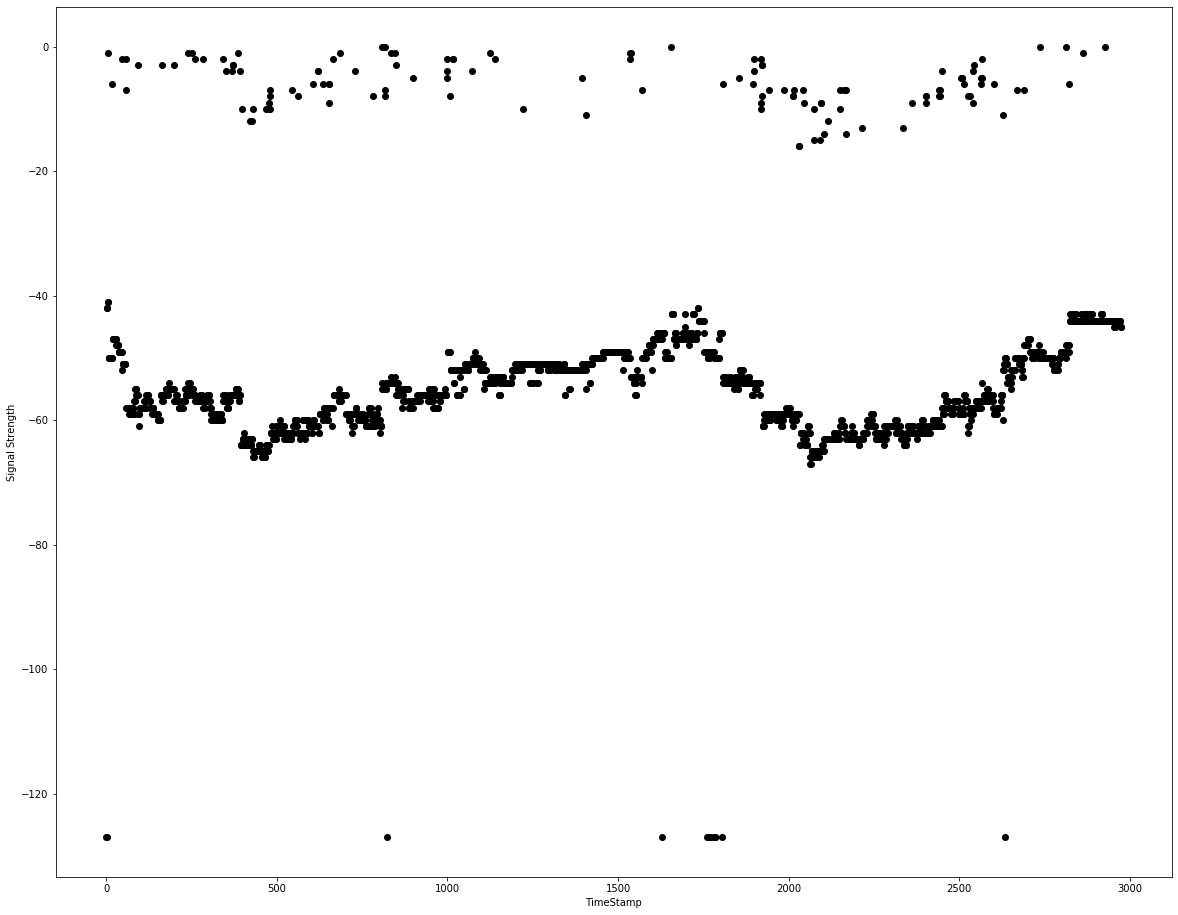

In [58]:
figure(num=None, figsize=(20, 16))
plt.xlabel('TimeStamp')
plt.ylabel('Signal Strength')
plt.plot(y1, x1.T[4], 'o', color='black');

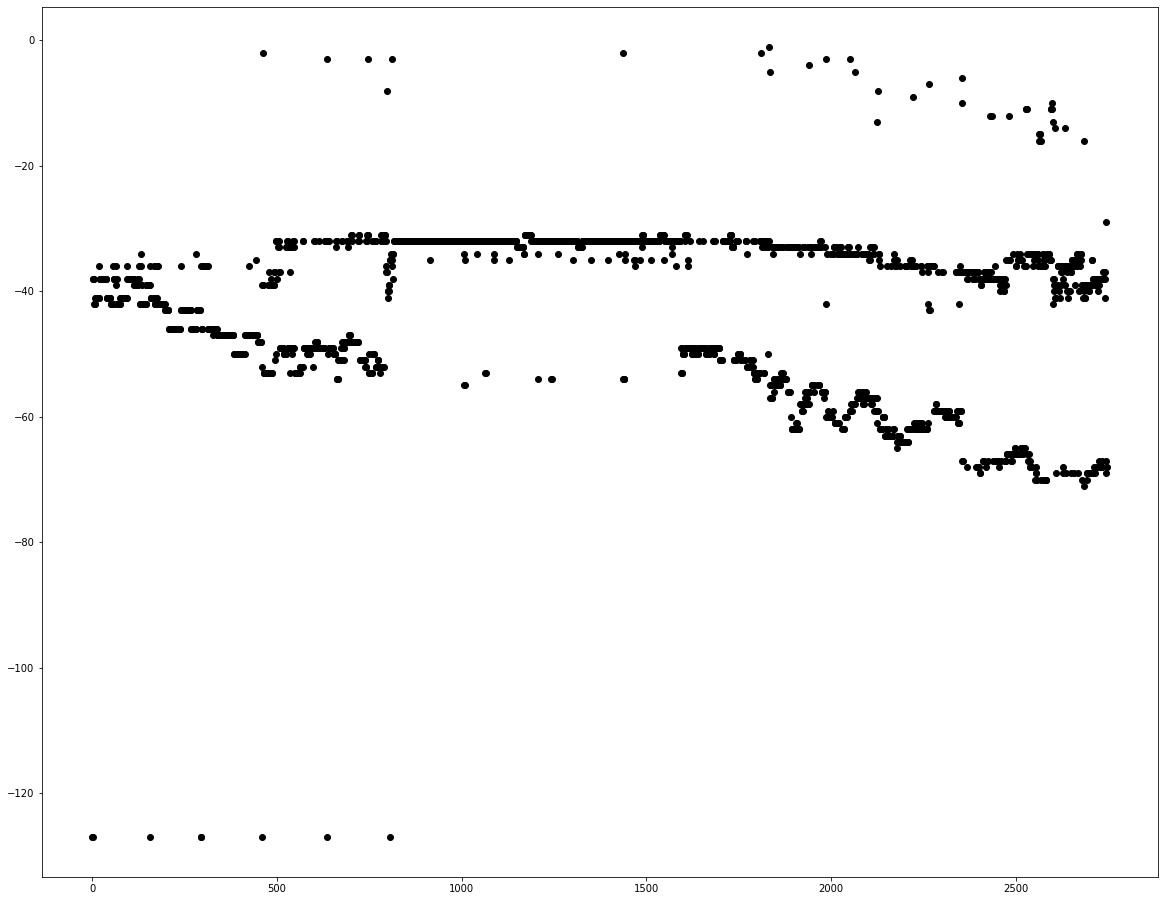

In [25]:
figure(num=None, figsize=(20, 16))
plt.plot(y2, x2.T[4], 'o', color='black');

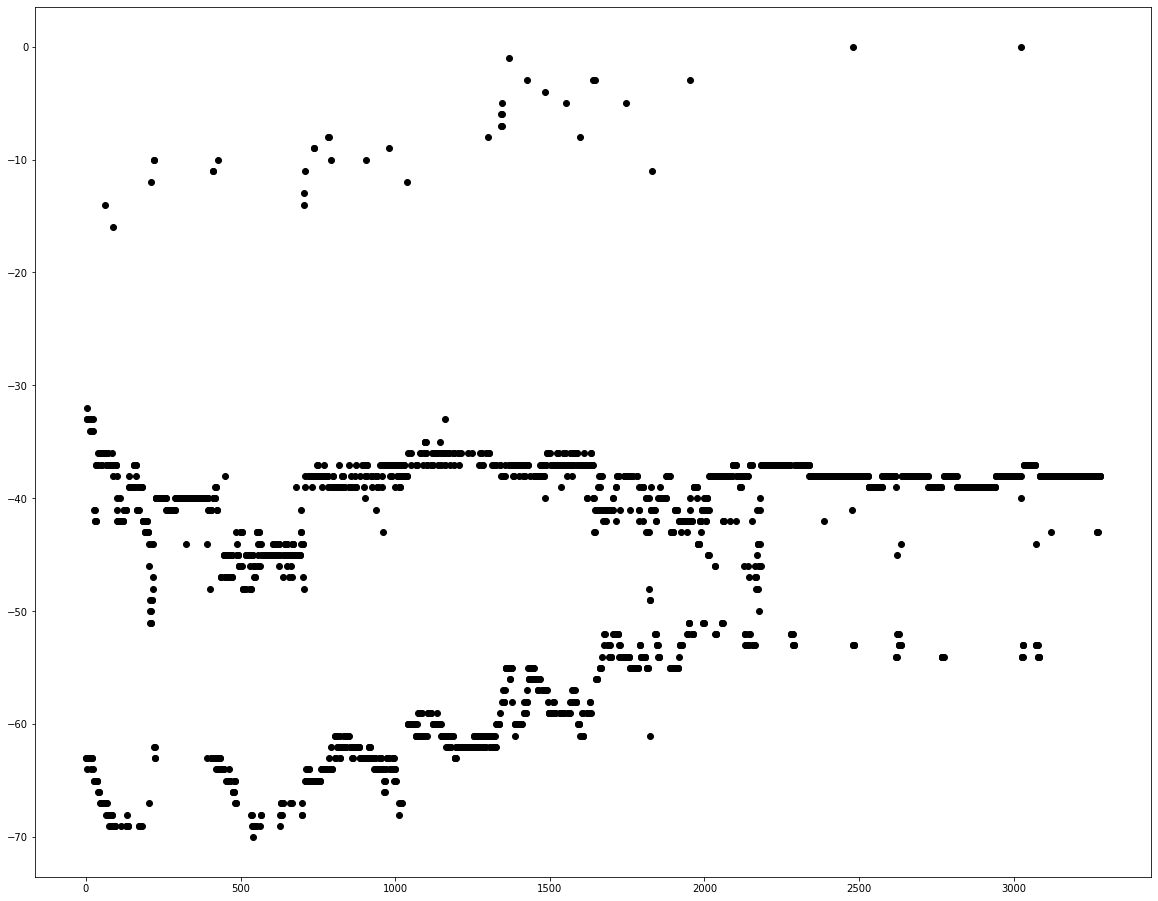

In [11]:
figure(num=None, figsize=(20, 16))
plt.plot(y3, x3.T[4], 'o', color='black');

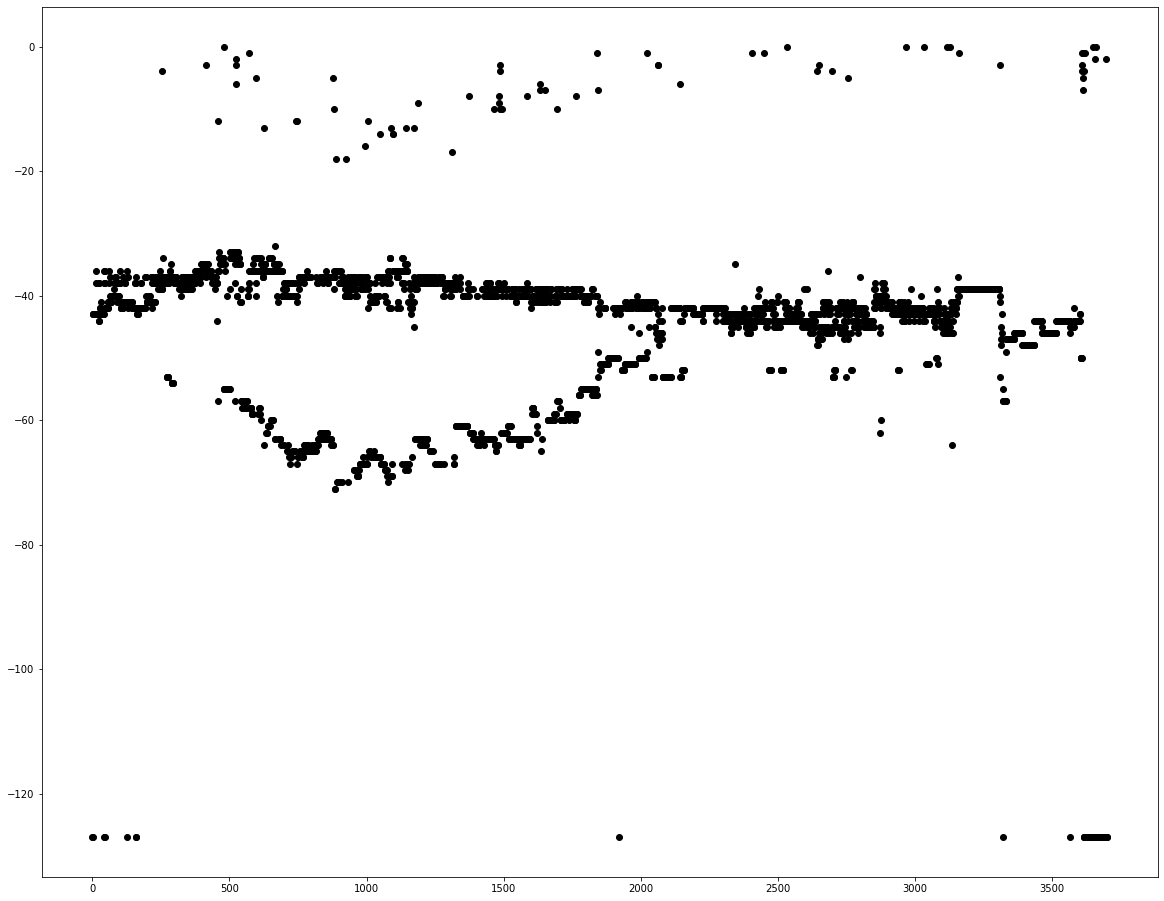

In [12]:
figure(num=None, figsize=(20, 16))
plt.plot(y4, x4.T[4], 'o', color='black');

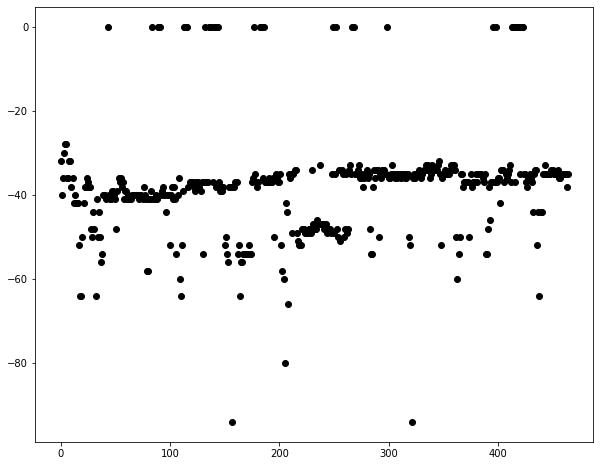

In [9]:
figure(num=None, figsize=(10, 8))
plt.plot(y5, x5.T[4], 'o', color='black');

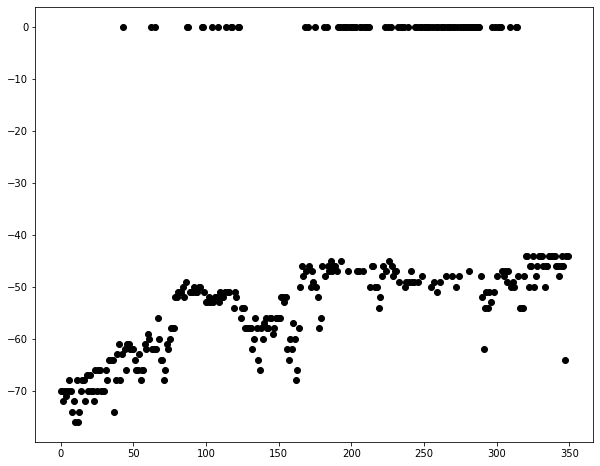

In [32]:
figure(num=None, figsize=(10, 8))
plt.plot(y6, x6.T[4], 'o', color='black');